<a href="https://colab.research.google.com/github/ankithanatgit/seaborn_data_analysis/blob/main/Computer_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

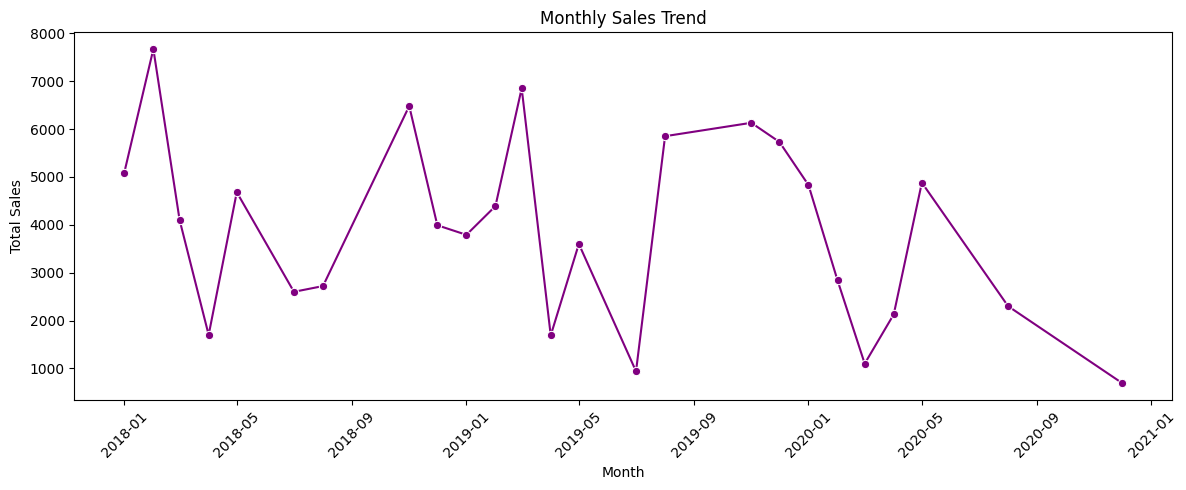

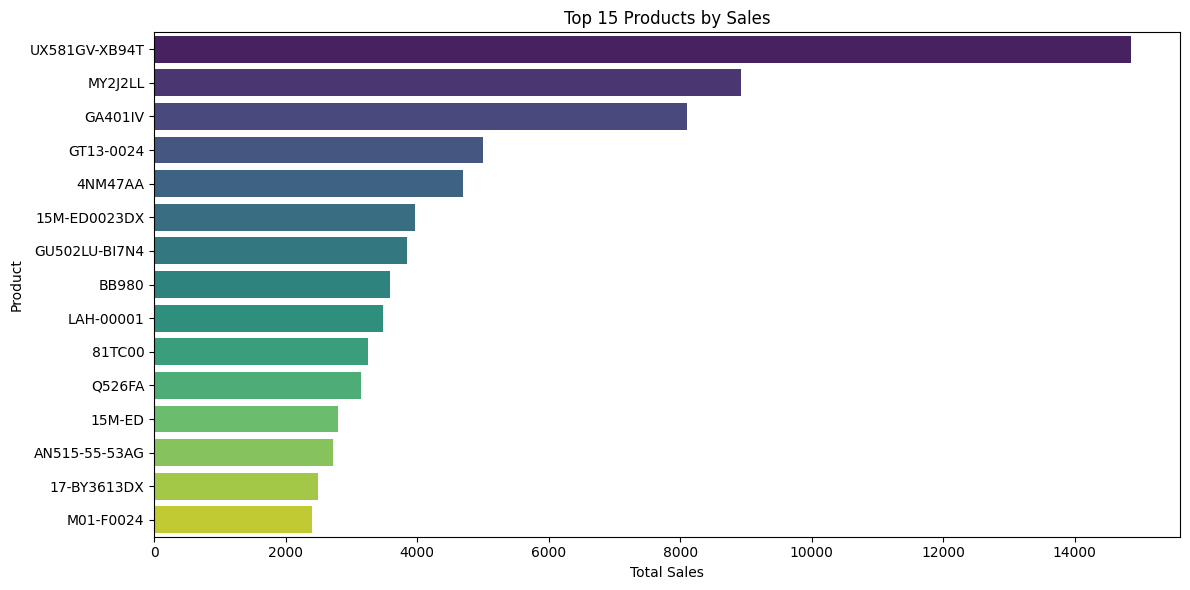

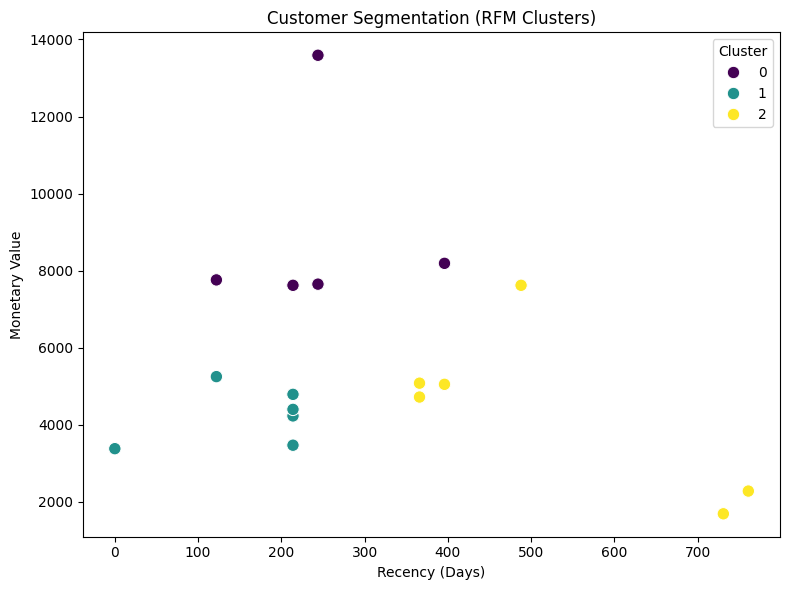

In [14]:
# -------------------------------
# SALES DASHBOARD (SEABORN)
# -------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# -------------------------------
# LOAD DATA
# -------------------------------
df = pd.read_csv("ComputerSales.csv")

# -------------------------------
# CLEAN COLUMNS
# -------------------------------
df.columns = df.columns.str.strip()

# infer columns
sales_col = "Sale Price"
product_col = [c for c in df.columns if "Product" in c][0]
customer_col = "Contact"

# create a proper date column from Month + Year
df["Month"] = df["Month"].astype(str)
df["Year"] = df["Year"].astype(str)
df["Date"] = pd.to_datetime(df["Year"] + "-" + df["Month"] + "-01", errors="coerce")

# -------------------------------
# 1) MONTHLY SALES TREND
# -------------------------------
monthly_sales = df.groupby("Date")[sales_col].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="Date", y=sales_col ,color="purple", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 2) PRODUCT PERFORMANCE (TOP 15)
# -------------------------------
top_products = (
    df.groupby(product_col)[sales_col]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products,
    x=sales_col,
    y=product_col,
    hue=product_col, # Added hue based on the warning suggestion
    orient="h",
    palette="viridis",
    legend=False # Added legend=False as suggested by the warning
)
plt.title("Top 15 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# -------------------------------
# 3) CUSTOMER SEGMENTATION (RFM)
# -------------------------------

# Recency
df["Recency"] = (df["Date"].max() - df["Date"]).dt.days

# Frequency
freq = df.groupby(customer_col)["Sale ID"].count().rename("Frequency")

# Monetary
monetary = df.groupby(customer_col)[sales_col].sum().rename("Monetary")

# Build RFM DataFrame
rfm = pd.concat([df.groupby(customer_col)["Recency"].min(), freq, monetary], axis=1)

# normalize
rfm_norm = (rfm - rfm.mean()) / rfm.std()

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
rfm["Cluster"] = kmeans.fit_predict(rfm_norm)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm,
    x="Recency",
    y="Monetary",
    hue="Cluster",
    palette="viridis",
    s=80
)
plt.title("Customer Segmentation (RFM Clusters)")
plt.xlabel("Recency (Days)")
plt.ylabel("Monetary Value")
plt.tight_layout()
plt.show()